In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import json
import pickle

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Feature Engineering

In [5]:
df["sex"].unique()


array(['female', 'male'], dtype=object)

In [6]:
df["sex"].replace({"female":0,"male":1},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [8]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


<AxesSubplot:>

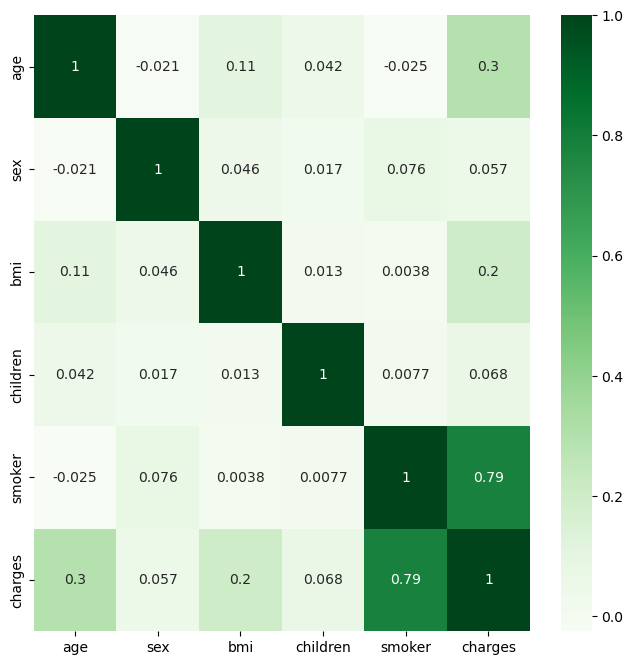

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [12]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df=pd.get_dummies(df,columns=["region"])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## Feature Selection

In [15]:
df.head(1)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.924,0,0,0,1


In [16]:
x=df.drop("charges",axis=1)

In [17]:
y=df["charges"]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [19]:
X = x.transpose()

## Model Training

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
lr_model.score(X_test,Y_test)

0.7696118054369009

In [22]:
y_pred_train = lr_model.predict(X_train)
mse = mean_squared_error(Y_train,y_pred_train)
print("MSE",mse)

rmse = np.sqrt(mse)
print("RMSE",rmse)

MAE = mean_absolute_error(Y_train,y_pred_train)
print("MAE",MAE)
r2 = r2_score(Y_train,y_pred_train)
print("R-Squared",r2)

MSE 37730549.72357765
RMSE 6142.519818737067
MAE 4251.255798614476
R-Squared 0.742398009060026


In [23]:
y_pred_test = lr_model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred_test)
print("MSE",mse)

rmse = np.sqrt(mse)
print("RMSE",rmse)

MAE = mean_absolute_error(Y_test,y_pred_test)
print("MAE",MAE)
r2 = r2_score(Y_test,y_pred_test)
print("R-Squared",r2)

MSE 33780509.57479167
RMSE 5812.100272258874
MAE 4145.450555627591
R-Squared 0.7696118054369009


In [31]:
age = 19.000
sex     = "male"
bmi     = 27.900
children =0
smoker  = "no"
region    = "northwest"

In [32]:
project_data = {"sex":{"female":0,"male":1},
               "smoker":{"yes":1,"no":0},
               "columns":list(x.columns)}

In [33]:
column_names = x.columns
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = project_data["sex"][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data["smoker"][smoker]
region    = "region_"+ region
region_index = np.where(column_names == region)[0][0]
test_array[region_index] = 1
test_array

array([19. ,  1. , 27.9,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ])

In [34]:
lr_model.predict([test_array])

C:\Users\91996\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1943.05780115])

In [35]:
with open("Linear_model.pkl","wb") as f:
    pickle.dump(lr_model,f)

In [36]:
with open("project_data.json","w") as f:
    json.dump(project_data,f)